In [233]:
# import sys
# sys.path = ['', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python27.zip', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-darwin', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac/lib-scriptpackages', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-tk', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-old', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-dynload', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages', '/Library/Python/2.7/site-packages']
import tweepy       # python wrapper for twitter api
import json
import time
import requests
import pandas as pd
import numpy as np
# step 0, get your own twitter credentials!

In [234]:
# this is my own personal twitter api information
# if you could be so kind as to sign up yourself on both twitter and mashape that'd be great :)
# It's FREEEEEEE
api_key = 'g5uPIpw80nULQI1gfklv2zrh4'
api_secret = 'cOWvNWxYvPmEZ0ArZVeeVVvJu41QYHdUS2GpqIKtSQ1isd5PJy'
access_token = '49722956-TWl8J0aAS6KTdcbz3ppZ7NfqZEmrwmbsb9cYPNELG'
access_secret = '3eqrVssF3ppv23qyflyAto8wLEiYRA8sXEPSghuOJWTub'

In [235]:
# Documentation is your friend! http://docs.tweepy.org/en/v3.1.0/
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth) # returns a tweepy authorization handler object

In [236]:
# 1. Use Twitter API to stream and store tweets (300 per candidate)
# explain geocode is doing
bernie_tweets =  api.search(q="#berniesanders", count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#bernie', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#FeelTheBern', count=100, geocode="37.781157,-122.398720,50mi")
hilary_tweets = api.search(q='#ImWithHer', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#hillaryclinton', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#hillary2016', count=100, geocode="37.781157,-122.398720,50mi")
the_donald_tweets = api.search(q='#donaldtrump', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#trump2016', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#trump', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#makeamericagreatagain', count=100, geocode="37.781157,-122.398720,50mi")

In [237]:
the_donald_tweets[0]

Status(contributors=None, truncated=False, text=u'@serverport Yup! Coming from the #GOP #Bush Admin &amp; his #horrible #IraqWar.\nKind of ur fault if you ask me.\n#HillaryClinton #DonaldTrump', is_quote_status=False, in_reply_to_status_id=730613109899976708, id=730621844005392384, favorite_count=1, _api=<tweepy.api.API object at 0x10f94a9d0>, author=User(follow_request_sent=False, has_extended_profile=True, profile_use_background_image=True, _json={u'follow_request_sent': False, u'has_extended_profile': True, u'profile_use_background_image': True, u'default_profile_image': False, u'id': 29584150, u'profile_background_image_url_https': u'https://pbs.twimg.com/profile_background_images/604738059897143296/dzCp250L.png', u'verified': False, u'profile_text_color': u'333333', u'profile_image_url_https': u'https://pbs.twimg.com/profile_images/727719191453814786/FUJroCgQ_normal.jpg', u'profile_sidebar_fill_color': u'F6F6F6', u'entities': {u'description': {u'urls': []}}, u'followers_count': 10

In [239]:
# wrappers come with built in python attributes and methods!
print dir(the_donald_tweets[0])

['__class__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__getattribute__', '__getstate__', '__hash__', '__init__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [240]:
print the_donald_tweets[0].created_at
print the_donald_tweets[0].text
print the_donald_tweets[0].favorite_count
print the_donald_tweets[0].favorited
print the_donald_tweets[0].lang
print the_donald_tweets[0].geo
print the_donald_tweets[0].retweet_count
print the_donald_tweets[0].retweeted
print the_donald_tweets[0].possibly_sensitive
print the_donald_tweets[0].coordinates

2016-05-12 04:53:16
@serverport Yup! Coming from the #GOP #Bush Admin &amp; his #horrible #IraqWar.
Kind of ur fault if you ask me.
#HillaryClinton #DonaldTrump
1
False
en
None
0
False


AttributeError: 'Status' object has no attribute 'possibly_sensitive'

In [241]:
def parse_status_objects(tweet_list, candidate, party):
   modified_tweets = list()
   for x in tweet_list:
       modified_tweets.append( [
               x.created_at,
               x.text,
               x.favorite_count,
               x.favorited,
               x.lang,
               x.geo,
               x.retweet_count,
               x.retweeted,
               x.coordinates,
               candidate,
               party
               ])
   return modified_tweets
       
hilary_tweets = parse_status_objects(hilary_tweets, 0, 1)
the_donald_tweets = parse_status_objects(the_donald_tweets, 2, 0)
bernie_tweets = parse_status_objects(bernie_tweets, 1, 1)

In [242]:
print bernie_tweets[0]
print the_donald_tweets[0]
print hilary_tweets[0]

[datetime.datetime(2016, 5, 12, 4, 57, 40), u'Time to throw down some more cash for #BernieSanders! https://t.co/RfK2xdigyS', 0, False, u'en', None, 0, False, None, 1, 1]
[datetime.datetime(2016, 5, 12, 4, 53, 16), u'@serverport Yup! Coming from the #GOP #Bush Admin &amp; his #horrible #IraqWar.\nKind of ur fault if you ask me.\n#HillaryClinton #DonaldTrump', 1, False, u'en', None, 0, False, None, 2, 0]
[datetime.datetime(2016, 5, 12, 5, 8, 26), u'RT @Melomelly2: Onward to the #OregonPrimary #KentuckyPrimary ! #ImWithHer #Hillary2016 #HillYes #Hillarystrong https://t.co/1eIbFUnt2y', 0, False, u'en', None, 7, False, None, 0, 1]


In [339]:
# 2 Create a dataframe that combines all of the tweets from each candidate
# To do so, you will need to concat the data frames
# so each row is a tweet and your columns should be 
# date, text, favorite_count,favorited, language, geocode, rwtweet count, retweeted, coordinates


politics = pd.concat([pd.DataFrame(bernie_tweets),pd.DataFrame(the_donald_tweets),pd.DataFrame(hilary_tweets)])
politics.columns=['date','text','favorite_count','favorited','language','geocode','retweet count','retweeted','coordinates',\
           'candidate','party']
politics.head()



,date,text,favorite_count,favorited,language,geocode,retweet count,retweeted,coordinates,candidate,party
0,2016-05-12 04:57:40,Time to throw down some more cash for #BernieS...,0,False,en,None,0,False,None,1,1
1,2016-05-12 04:29:15,The future of our country is at stake. Fight O...,0,False,en,None,0,False,None,1,1
2,2016-05-12 04:12:12,RT @AbsurdityGalore: @thomassuzanne43 I am a f...,0,False,en,None,3,False,None,1,1
3,2016-05-12 03:46:33,@serverport #BillClinton created 22 million #J...,1,False,en,None,0,False,None,1,1
4,2016-05-12 03:39:35,"FBI INVESTIGATION, Losing to Trump in polls, A...",1,False,en,None,0,False,None,1,1


In [340]:
# 3 Create a function to take in a string and output the textblob sentiment of that string

def detect_sentiment(string):
    return TextBlob(string).sentiment.polarity


In [342]:
# 4 Add a column to your data frame called 'sentiment' which holds the sentiment of that tweet (hint: use the function from #3)

import sys
sys.path = ['', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python27.zip', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-darwin', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac/lib-scriptpackages', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-tk', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-old', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-dynload', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages', '/Library/Python/2.7/site-packages']
import pandas as pd
import numpy as np
import scipy as sp
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

politics['sentiment'] = politics.text.apply(detect_sentiment)

politics.head()


,date,text,favorite_count,favorited,language,geocode,retweet count,retweeted,coordinates,candidate,party,sentiment
0,2016-05-12 04:57:40,Time to throw down some more cash for #BernieS...,0,False,en,None,0,False,None,1,1,0.234722
1,2016-05-12 04:29:15,The future of our country is at stake. Fight O...,0,False,en,None,0,False,None,1,1,0.000000
2,2016-05-12 04:12:12,RT @AbsurdityGalore: @thomassuzanne43 I am a f...,0,False,en,None,3,False,None,1,1,0.000000
3,2016-05-12 03:46:33,@serverport #BillClinton created 22 million #J...,1,False,en,None,0,False,None,1,1,0.000000
4,2016-05-12 03:39:35,"FBI INVESTIGATION, Losing to Trump in polls, A...",1,False,en,None,0,False,None,1,1,0.214286


In [343]:
# 5 create a word count column, which holds the number of words in the text column

def get_word_count(a):
        return len(a.split())
from collections import Counter
politics['word_count'] = politics['text'].apply(get_word_count)
politics.head()

,date,text,favorite_count,favorited,language,geocode,retweet count,retweeted,coordinates,candidate,party,sentiment,word_count
0,2016-05-12 04:57:40,Time to throw down some more cash for #BernieS...,0,False,en,None,0,False,None,1,1,0.234722,10
1,2016-05-12 04:29:15,The future of our country is at stake. Fight O...,0,False,en,None,0,False,None,1,1,0.000000,22
2,2016-05-12 04:12:12,RT @AbsurdityGalore: @thomassuzanne43 I am a f...,0,False,en,None,3,False,None,1,1,0.000000,20
3,2016-05-12 03:46:33,@serverport #BillClinton created 22 million #J...,1,False,en,None,0,False,None,1,1,0.000000,16
4,2016-05-12 03:39:35,"FBI INVESTIGATION, Losing to Trump in polls, A...",1,False,en,None,0,False,None,1,1,0.214286,18


In [354]:
5# use countvectorizer to create a document-term matrix and concatinate it to your main dataframe
#(hint you should now have thousands of columns)

import sys
sys.path = ['', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python27.zip', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-darwin', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac/lib-scriptpackages', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-tk', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-old', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-dynload', '/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages', '/Library/Python/2.7/site-packages']
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


vect = CountVectorizer()
tf = vect.fit_transform(politics.text)

'''
politics_new = politics.join(tf, lsuffix='_a', rsuffix='_b')

politics_new = pd.DataFrame(politics_new)
politics_new.shape
'''

politics_tf = pd.DataFrame(tf.toarray(), index=politics.index)
print tf.shape
print politics.shape
politics_new = pd.concat([politics,politics_tf],axis=1)

print politics_new.shape


(1000, 2456)
(1000, 13)
(1000, 2469)


In [358]:
# 6 Use kmean to create clusters for the dataframe

#politics_new.dtypes
X = politics_new.drop(politics_new.columns[[0, 1,3,4,5,7,8,11]], axis=1) 
# (encoding='utf-8',decode_error='ignore')
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)

km.fit(X)
km.labels_
politics_new['cluster'] = km.labels_
politics_new.sort('cluster')


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,date,text,favorite_count,favorited,language,geocode,retweet count,retweeted,coordinates,candidate,...,2447,2448,2449,2450,2451,2452,2453,2454,2455,cluster
0,2016-05-12 04:57:40,Time to throw down some more cash for #BernieS...,0,False,en,None,0,False,None,1,...,0,0,0,0,0,0,0,0,0,0
352,2016-05-11 14:56:04,RT @Anthony_Rocca: RETWEET NOW: 'Dozens' of Te...,0,False,en,None,73,False,None,2,...,0,0,0,0,0,0,0,0,0,0
353,2016-05-11 14:48:18,RT @Anthony_Rocca: RETWEET NOW: 'Dozens' of Te...,0,False,en,None,73,False,None,2,...,0,0,0,0,0,0,0,0,0,0
354,2016-05-11 14:46:58,RT @Anthony_Rocca: RETWEET NOW: 'Dozens' of Te...,0,False,en,None,73,False,None,2,...,0,0,0,0,0,0,0,0,0,0
355,2016-05-11 14:35:39,From Drudge: Hindus get it 😃 .@realDonaldTrum...,2,False,en,None,1,False,None,2,...,0,0,0,0,0,0,0,0,0,0
356,2016-05-11 14:34:49,#Capitals eliminated from playoffs after finis...,0,False,en,None,0,False,None,2,...,0,0,0,0,0,0,0,0,0,0
357,2016-05-11 08:01:20,RT @JohnMcGoo5: I liked a @YouTube video from ...,0,False,en,None,2,False,None,2,...,0,0,0,0,0,1,0,0,0,0
358,2016-05-11 07:45:05,RT @Boobaloo: Why I'm voting for Donald Trump ...,0,False,en,None,1,False,None,2,...,0,0,0,0,0,0,0,0,0,0
359,2016-05-11 07:33:07,Why I'm voting for Donald Trump #MakeAmericaGr...,2,False,en,None,1,False,None,2,...,0,0,0,0,0,0,0,0,0,0
360,2016-05-11 07:02:32,Retweeted Donald J. Trump (@realDonaldTrump):\...,2,False,en,None,0,False,None,2,...,0,0,0,0,0,0,0,0,0,0


In [359]:
# 7 Explore the clusters
# What is interesting? Surprising? Can you draw any inferences about each cluster?
# Write your answer to these questions in markdown

politics['cluster'] = km.labels_
politics.groupby('cluster').mean()

# 2 = high retweet count #0 = above zero favorite count #1 = negative sentiment?

,favorite_count,favorited,retweet count,retweeted,candidate,party,sentiment,word_count
cluster,,,,,,,,
0,0.597162,False,9.074236,False,1.052402,0.634279,0.077060,15.379913
1,0.000000,False,161.486842,False,1.736842,0.144737,-0.237939,19.026316
2,0.000000,False,507.875000,False,0.500000,1.000000,0.050000,11.625000


In [360]:
# 8 Create a column called 'democrat' and assign it to the corresponding candidate name for all the records
# 1 for bernie and hilary and 0 for donald trump

# this is already shown by "party" column 


(1000, 2)
(1000,)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
0.68
[0.71099999999999997, 0.66700000000000004, 0.68000000000000005, 0.64600000000000002, 0.66300000000000003, 0.65800000000000003, 0.64300000000000002, 0.63, 0.625, 0.621, 0.61799999999999999, 0.629, 0.625, 0.625, 0.61399999999999999, 0.621, 0.621, 0.61699999999999999, 0.60299999999999998, 0.59799999999999998, 0.60199999999999998, 0.60499999999999998, 0.59399999999999997, 0.58299999999999996, 0.58299999999999996, 0.57999999999999996, 0.58599999999999997, 0.59399999999999997, 0.58699999999999997]


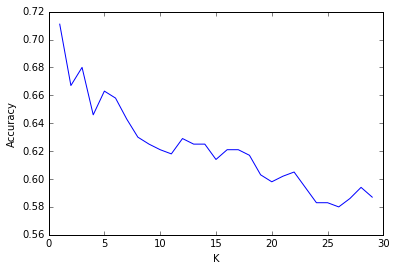

In [375]:
# 9 Estimate classification models using knn and logistic regession.  Dont forget to use cross validation 
    # (do not use cross_val_score because we will want a confusion matrix).
# Use a three class response variable for knn.  For logistic regression predict democrat or republic?
#Assess the pros and cons of both approaches
#Extra Credit: Estimate multinomial regression model using the three class response variable

# knn classification model

import matplotlib.pyplot as plt
%matplotlib inline

X = politics_new[['sentiment', 'retweet count'] ]
y = politics_new['candidate'] 

print X.shape
print y.shape

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)    
print knn.fit(X, y) 
print knn.score(X, y)


scores = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    scores.append(knn.score(X, y))
    
print scores

plt.plot(range(1,30), scores)
plt.ylabel("Accuracy")
plt.xlabel("K")


In [363]:
from sklearn.cross_validation import cross_val_score
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print scores
np.mean(scores)

#can you explain how this score is different from the scores up there ^^^

[ 0.44  0.73  0.56  0.42  0.48  0.72  0.57  0.61  0.55  0.4 ]


0.54799999999999993

In [403]:
# logistic regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
X_log = politics_new[['sentiment', 'retweet count'] ]
y_log = politics_new['party'] 
logreg.fit(X_log, y_log)

logreg_score = logreg.score(X_log,y_log)
logreg_score


0.65500000000000003

In [397]:
# 10 Initialize a classification model (for both knn and logistic)

# knn

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y)

knn.fit(X_train, y_train)

knn_null_accuracy = 400/1000.0
knn_score = knn.score(X_test,y_test)

print knn_null_accuracy
print knn_score

knn.predict(X_test)

0.4
0.532


array([2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2,
       0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1,
       2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1,
       0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0,
       1, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 2,
       0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2,
       0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2,
       1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2])

In [404]:
X_log_train, X_log_test, y_log_train, y_log_test = cross_validation.train_test_split(X_log, y_log)

logreg.fit(X_log_train, y_log_train)

logreg_null_accuracy = 400/1000.0
logreg_score = knn.score(X_log_test,y_log_test)

print logreg_null_accuracy
print logreg_score

#why is logreg_score lower than null??

0.4
0.36


In [387]:
# 11 Train your classification model  (for both knn and logistic)


In [ ]:
# 12 Predict on your test features and targets (for both knn and logistic)

In [400]:
# 13 output your accuracy (for both knn and logistic)

print logreg_score
print knn_score

0.34
0.532


In [406]:
# 14 Create a confusion matrix for your predictions (for both knn and logistic)

# logistic regression 

from sklearn import metrics
preds = logreg.predict(X_log)
print metrics.confusion_matrix(y_log, preds)

# knn

from sklearn import metrics
preds_knn = knn.predict(X)
print metrics.confusion_matrix(y, preds_knn)


##Top Left: True Negatives 
##Top Right False Positives 
##Bottom Left: False Negatives 
##Bottom Right: True Positives 

[[ 90 310]
 [ 38 562]]
[[120 116  64]
 [ 21 236  43]
 [ 16 165 219]]


In [ ]:
# 15 Who is the easiest candidate to predict? Why do you think? Who is the hardest? Why do you think?
# Write your answers in markdown (for both knn and logistic)


# not sure how to read the confusion matrix - can we go over this?

In [ ]:
# 16 What are some extra features (data points) you would like to add to this data set. Explain in markdown.
# (hint maybe something like a boolean, "has_hashtag")

# gender pronouns so we can identify hillary

In [ ]:
# 17 Try adding extra features to improve the quality of your predictions (for both knn and logistic)